# LatLonProfiles diagnostic

The aim of this diagnostic is to visualise latitudinal or longitudinal profiles of a certain variable. In addition, plots are allowed to have multiple lines and/or show the seasonal and annual means of the selected variable.


In [1]:
%reload_ext autoreload
%autoreload 2

Let's start with the import of the class `LatLonProfiles`:

In [2]:
from aqua.diagnostics.lat_lon_profiles import LatLonProfiles

We generate a dictionary, `dataset_dict`, including the data we want to plot in this notebook, while `common_dict` displays the characteristics of the data to be plotted.

In [3]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly'}
common_dict = {'startdate': '1990-01-01',
               'enddate': '1999-12-31',
               'loglevel': 'info'}

We hence generate an object of the `LatLonProfiles` class, and we decide to plot a zonal profile as an example. This means that the code will be performing the zonal mean, by averaging across the longitudes. 

By default, the `mean_type` parameter in set as 'zonal' (so the profile will be zonal even without a specific `mean_type` setting), but to visualise the meridional profile, one can just set it to 'meridional'.

In [4]:
lonlat_dataset = LatLonProfiles(**dataset_dict, **common_dict, mean_type='zonal')

2025-07-02 09:46:26 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None


And we select the variable we want to plot as well as its measure units:

In [5]:
run_dict = {'var': '2t',
            'units': 'degC'}

We prepare the data to be plotted via the `run` method of the LatLonProfiles class:

In [ ]:
lonlat_dataset.run(**run_dict)

2025-07-02 09:46:27 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for 2t


2025-07-02 09:46:27 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-07-02 09:46:27 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-02 09:46:27 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-07-02 09:46:27 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-07-02 09:46:28 :: Reader :: INFO     -> Grid metadata is lon-lat
2025-07-02 09:46:28 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-07-02 09:46:28 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data


The main diagnostic class for plotting is PlotLatLonProfiles, that we import:

In [ ]:
from aqua.diagnostics.lat_lon_profiles import PlotLatLonProfiles

Both seasonal and annual data can be plotted. Let us start with a single line plot of the `2t` monthly data. When monthly data are given as argument, these will be always prioritised by the class.

## Single profile
### Single plot
We can choose how to select the timestep, with `isel` or by selecting the month of interest with `sel`.

In [ ]:
single_month = lonlat_dataset.monthly.isel(time=0)
#single_month = lonlat_dataset.monthly.sel(time='1990-01-31')
single_annual = lonlat_dataset.annual.isel(time=0)
#single_annual = lonlat_dataset.annual.sel(time='1990-12-31')

In [ ]:

plot_dict = {'monthly_data': single_month,
             'annual_data': single_annual,
             'loglevel': 'INFO'}

We here plot the single profile, retrieve the plot labels and info via the metadata. 

Lastly, we save the plot:

2025-07-02 06:56:28 :: create_folder :: INFO     -> Folder ./png already exists


2025-07-02 06:56:29 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-02 06:56:29 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.2t.png
2025-07-02 06:56:29 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.2t.png


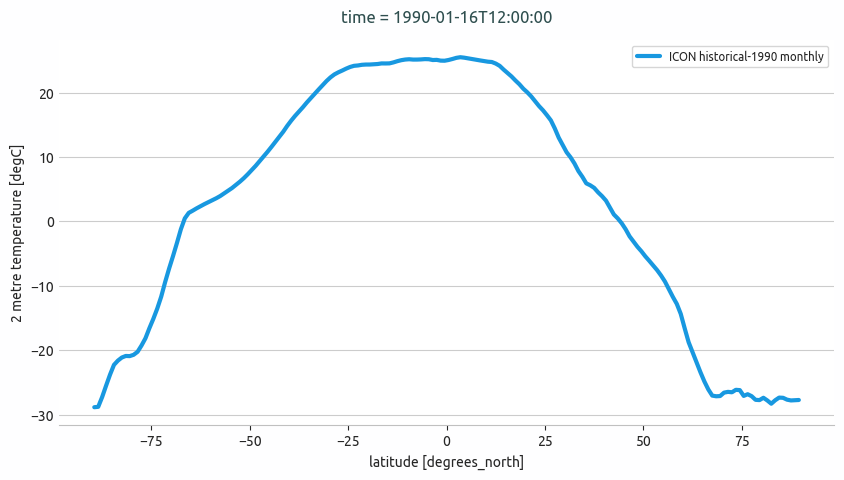

In [ ]:
plot = PlotLatLonProfiles(**plot_dict)
data_labels = plot.set_data_labels()
desc = plot.set_description()
title = plot.set_title(var=run_dict['var'], units=run_dict['units'])
fig, _ = plot.plot_lat_lon_profiles(data_labels=data_labels, title=title)
plot.save_plot(fig=fig, var=run_dict['var'], description=desc)

## Seasonal and annual mean profiles plot

We hence compute the seasonal and annual means for the `lonlat_dataset` object, to be prepared for the next plot:

In [ ]:
lonlat_dataset.compute_seasonal_and_annual_means()

2025-07-02 06:56:29 :: LatLonProfiles :: INFO     -> Computing seasonal and annual means from monthly data
2025-07-02 06:56:29 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-02 06:56:29 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-02 06:56:29 :: TimStat :: INFO     -> Computing annual mean...
2025-07-02 06:56:29 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully
2025-07-02 06:56:29 :: TimStat :: INFO     -> Computing annual mean...
2025-07-02 06:56:29 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully


The PlotLatLonProfiles class supports the possibility to plot the seasonal profiles for the DJF, MAM, JJA and SON seasons, as well as a big subplot at the bottom with the annual means. As such:

2025-07-02 06:56:29 :: PlotLatLonProfiles :: INFO     -> Running PlotLatLonProfiles
2025-07-02 06:56:29 :: PlotLatLonProfiles :: INFO     -> Plotting seasonal and annual means using multiple_lines
2025-07-02 06:56:29 :: PlotLatLonProfiles :: INFO     -> Plotting seasonal and annual means using multiple_lines


2025-07-02 06:56:30 :: PlotLatLonProfiles :: WARNING  -> Metadata not available, using default values for saving
2025-07-02 06:56:30 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-02 06:56:30 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-02 06:56:32 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.lat_lon_profiles_seasonal.unknown_catalog.unknown_model.unknown_exp.2t.png
2025-07-02 06:56:32 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.lat_lon_profiles_seasonal.unknown_catalog.unknown_model.unknown_exp.2t.png
2025-07-02 06:56:32 :: PlotLatLonProfiles :: INFO     -> PlotLatLonProfiles completed successfully
2025-07-02 06:56:32 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.lat_lon_profiles_seasonal.unknown_catalog.unknown_model.unknown_exp.2t.png
2025-07-02 06:56:32 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.lat_lon_profiles_seasonal.unknown_catalog.unknown_model.u

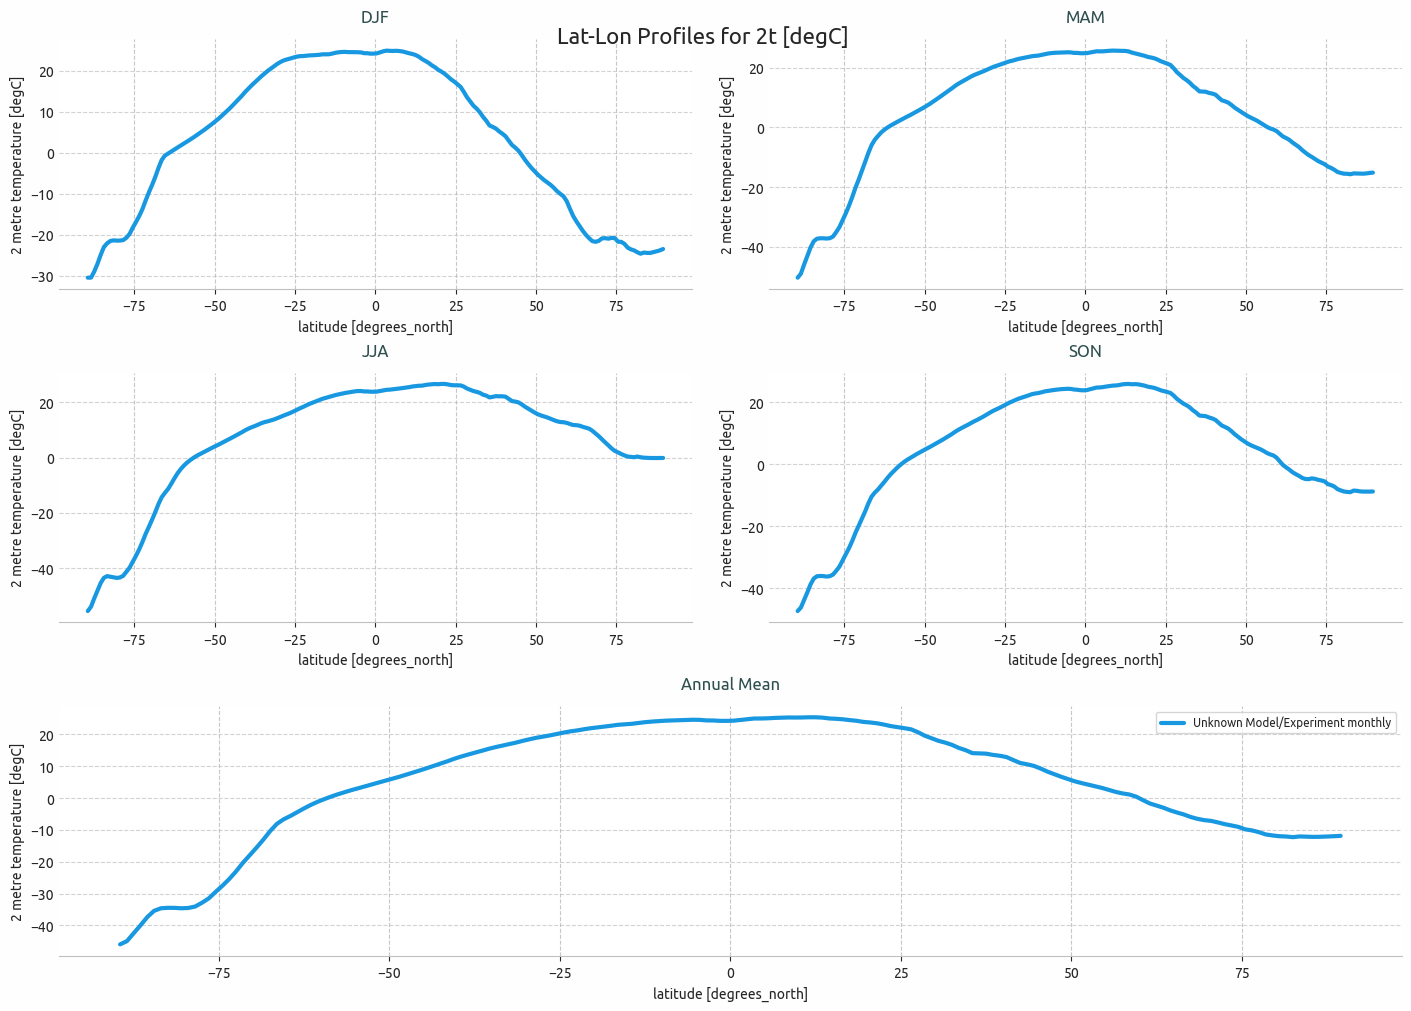

In [ ]:
seasonal_plot = PlotLatLonProfiles(seasonal_annual_data=lonlat_dataset.seasonal_annual_means, loglevel='INFO')
seasonal_plot.run(var=run_dict['var'], units=run_dict['units'], plot_type='seasonal')

## Multi-line Profiles

We now increase the number of lines which can be plotted on the same plot.

We just run the code with a new variable from the same dataset and we choose `t` which, compared to `2t`, includes multiple pressure levels.

In [ ]:
# Setup second dataset with different variable
# Using atmospheric temperature (t) vs surface temperature (2t) for comparison

dataset_dict_2 = {'catalog': 'climatedt-phase1',
                  'model': 'ICON',
                  'exp': 'historical-1990',
                  'source': 'lra-r100-monthly'}

lonlat_dataset_2 = LatLonProfiles(**dataset_dict_2, **common_dict)

# Use atmospheric temperature on pressure levels
run_dict_2 = {'var': 't',  # Atmospheric temperature on pressure levels
              'units': 'degC'}

lonlat_dataset_2.run(**run_dict_2)

2025-07-02 06:56:33 :: LatLonProfiles :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2025-07-02 06:56:33 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for t
2025-07-02 06:56:33 :: LatLonProfiles :: INFO     -> Running LatLonProfiles for t
2025-07-02 06:56:33 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-07-02 06:56:33 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2025-07-02 06:56:33 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-02 06:56:33 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-07-02 06:56:33 :: Fixer :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2025-07-02 06:56:33 :: Fixer :: INFO     -> Convention dictionary: eccodes-2.39.0
2025-07-02 06:56:33 :: Fixer :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2025-07-02 06:56:33 :: Fixer :: INF

2025-07-02 06:56:45 | smmregrid.GridInspect |     INFO -> Updating the log_level to INFO
2025-07-02 06:56:45 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-07-02 06:56:45 :: Regridder :: INFO     -> Grid name: lon-lat
2025-07-02 06:56:45 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_ICON_historical-1990_lra-r100-monthly.nc.
2025-07-02 06:56:45 :: CoordTransator :: INFO     -> Grid type: Regular
2025-07-02 06:56:45 :: CoordTransator :: INFO     -> Target data model: aqua
2025-07-02 06:56:45 :: Regridder :: INFO     -> Using provided dataset as a grid path for 2d
2025-07-02 06:56:45 :: Regridder :: INFO     -> Grid name: lon-lat
2025-07-02 06:56:45 :: Regridder :: INFO     -> Loading existing source area from /pfs/lustrep3/appl/local/climatedt/data/AQUA/areas/cell_area_ICON_historical-1990_lra-r100-monthly.nc.
2025-07-02 06:56:45 :: CoordTransator :: INFO     -> Grid type: Regular


2025-07-02 06:56:53 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-02 06:56:54 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png
2025-07-02 06:56:54 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png
2025-07-02 06:56:54 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png
2025-07-02 06:56:54 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.climatedt-phase1.ICON.historical-1990.multi_temp_levels.png


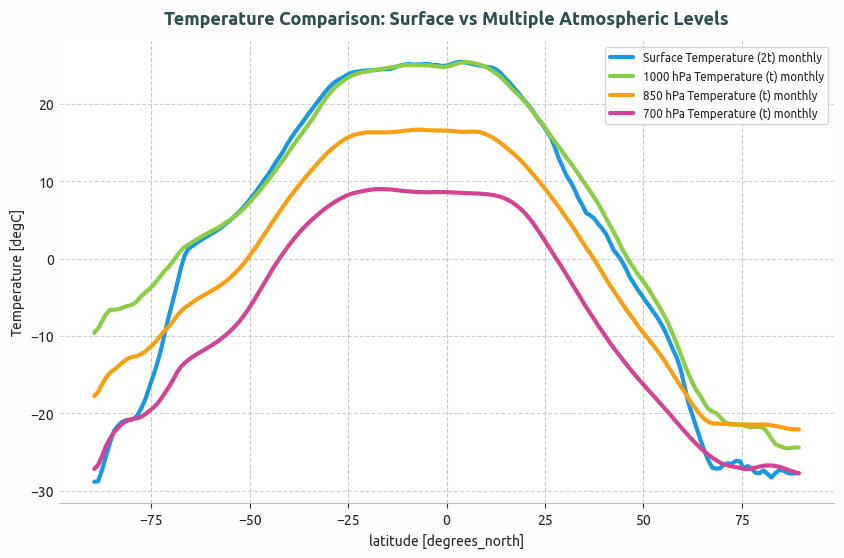

In [ ]:
# Multi-line plot comparing surface vs atmospheric temperature at multiple levels
# Note: atmospheric temperature is on pressure levels, so we select specific levels (1000, 850, 700 hPa)
multi_line_plot = PlotLatLonProfiles(
    monthly_data=[lonlat_dataset.monthly.isel(time=0),                           # Surface temp (2t)
                  lonlat_dataset_2.monthly.sel(plev=100000).isel(time=0),        # 1000 hPa level
                  lonlat_dataset_2.monthly.sel(plev=85000).isel(time=0),         # 850 hPa level
                  lonlat_dataset_2.monthly.sel(plev=70000).isel(time=0)],        # 700 hPa level
    annual_data=[lonlat_dataset.annual.isel(time=0),                             # Surface temp (2t)
                 lonlat_dataset_2.annual.sel(plev=100000).isel(time=0),          # 1000 hPa level
                 lonlat_dataset_2.annual.sel(plev=85000).isel(time=0),           # 850 hPa level
                 lonlat_dataset_2.annual.sel(plev=70000).isel(time=0)],          # 700 hPa level
    loglevel='INFO'
)

# Create multi-line plot comparing different temperature types
data_labels = [f"Surface Temperature ({run_dict['var']})", 
               f"1000 hPa Temperature ({run_dict_2['var']})",
               f"850 hPa Temperature ({run_dict_2['var']})",
               f"700 hPa Temperature ({run_dict_2['var']})"]
title = "Temperature Comparison: Surface vs Multiple Atmospheric Levels"
fig, ax = multi_line_plot.plot_multi_line_profiles(data_labels=data_labels, title=title)
multi_line_plot.save_plot(fig=fig, var="multi_temp_levels", description="Surface vs multiple atmospheric levels temperature comparison")

In [16]:
# Compute seasonal and annual means for both datasets
lonlat_dataset_2.compute_seasonal_and_annual_means()

2025-07-02 06:56:54 :: LatLonProfiles :: INFO     -> Computing seasonal and annual means from monthly data
2025-07-02 06:56:54 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-02 06:56:54 :: TimStat :: INFO     -> Computing annual mean...
2025-07-02 06:56:54 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully
2025-07-02 06:56:54 :: TimStat :: INFO     -> Computing seasonal means...
2025-07-02 06:56:54 :: TimStat :: INFO     -> Computing annual mean...
2025-07-02 06:56:54 :: LatLonProfiles :: INFO     -> Seasonal and annual means computed successfully


2025-07-02 06:57:17 :: PlotLatLonProfiles :: WARNING  -> Metadata not available, using default values for saving
2025-07-02 06:57:17 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-02 06:57:17 :: create_folder :: INFO     -> Folder ./png already exists
2025-07-02 06:57:19 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.lat_lon_profiles_seasonal_multi.unknown_catalog.unknown_model.unknown_exp.Surface Temp (2t)_1000 hPa Temp (t)_850 hPa Temp (t)_700 hPa Temp (t).png
2025-07-02 06:57:19 :: OutputSaver :: INFO     -> Saved PNG: ./png/timeseries.lat_lon_profiles_seasonal_multi.unknown_catalog.unknown_model.unknown_exp.Surface Temp (2t)_1000 hPa Temp (t)_850 hPa Temp (t)_700 hPa Temp (t).png
2025-07-02 06:57:19 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/timeseries.lat_lon_profiles_seasonal_multi.unknown_catalog.unknown_model.unknown_exp.Surface Temp (2t)_1000 hPa Temp (t)_850 hPa Temp (t)_700 hPa Temp (t).png
2025-07-02 06:5

(<Figure size 1400x1000 with 5 Axes>,
 [<Axes: title={'center': 'DJF'}, xlabel='latitude [degrees_north]', ylabel='Temperature [degC]'>,
  <Axes: title={'center': 'MAM'}, xlabel='latitude [degrees_north]', ylabel='Temperature [degC]'>,
  <Axes: title={'center': 'JJA'}, xlabel='latitude [degrees_north]', ylabel='Temperature [degC]'>,
  <Axes: title={'center': 'SON'}, xlabel='latitude [degrees_north]', ylabel='Temperature [degC]'>,
  <Axes: title={'center': 'Annual Mean'}, xlabel='latitude [degrees_north]', ylabel='Temperature [degC]'>])

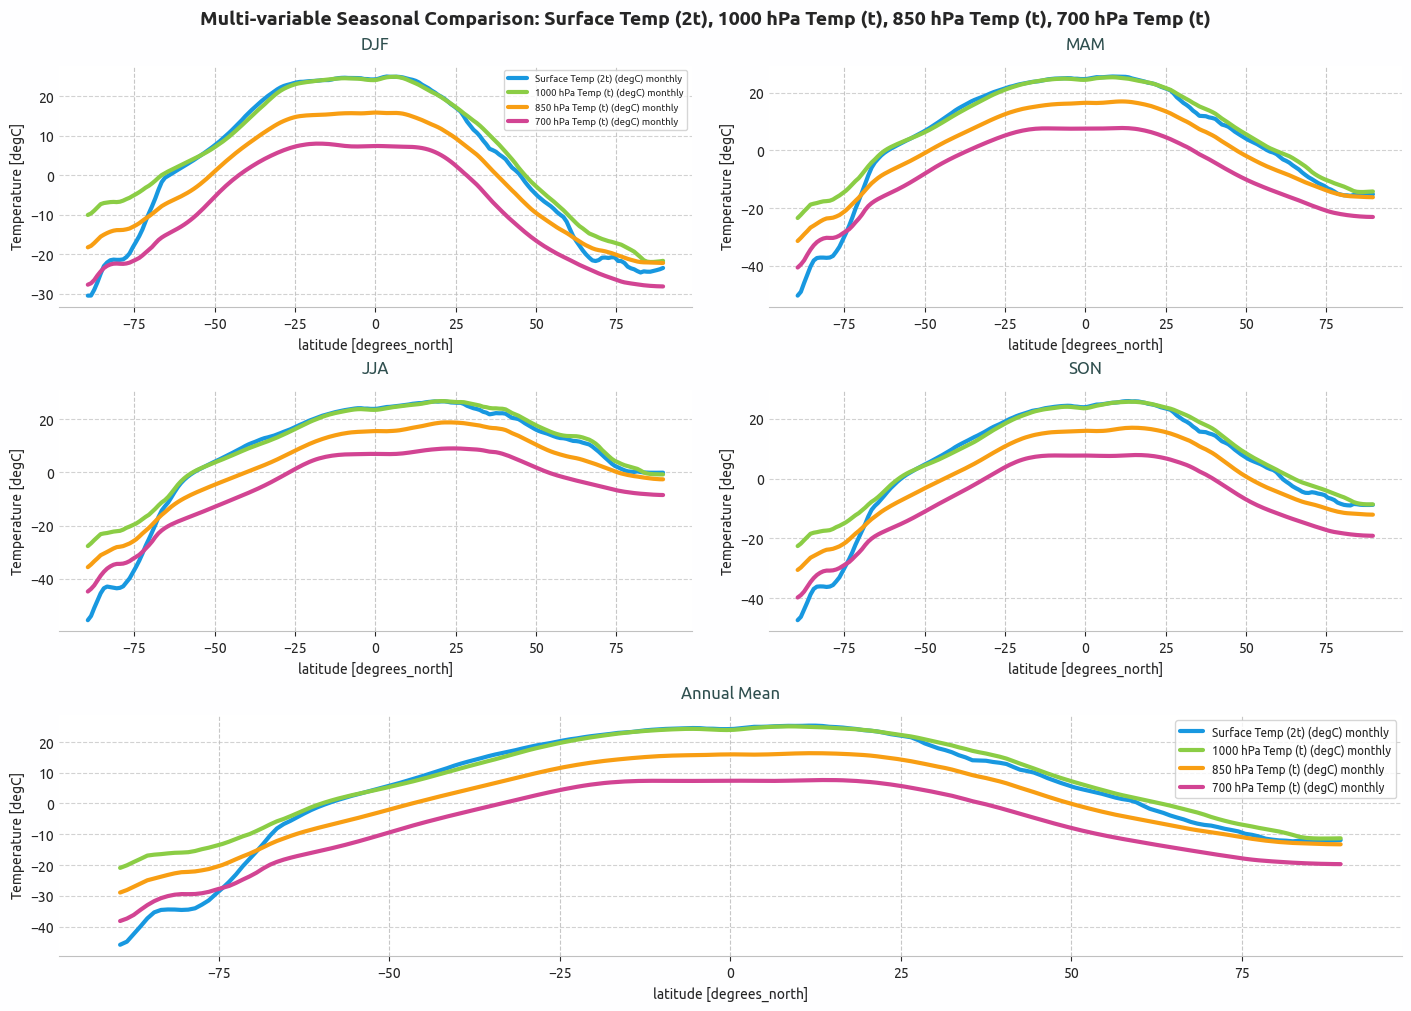

In [17]:
# Multi-line seasonal plot comparing surface vs atmospheric temperature at multiple levels
# Combine seasonal data from both datasets at different pressure levels
combined_seasonal_data = []
for i in range(5):  # DJF, MAM, JJA, SON, Annual
    combined_seasonal_data.append([
        lonlat_dataset.seasonal_annual_means[i],                                # Surface temp (2t)
        lonlat_dataset_2.seasonal_annual_means[i].sel(plev=100000),             # 1000 hPa level
        lonlat_dataset_2.seasonal_annual_means[i].sel(plev=85000),              # 850 hPa level
        lonlat_dataset_2.seasonal_annual_means[i].sel(plev=70000)               # 700 hPa level
    ])

seasonal_multi_plot = PlotLatLonProfiles(seasonal_annual_data=combined_seasonal_data, loglevel='INFO')
seasonal_multi_plot.run_multi_seasonal(
    var_names=[f"Surface Temp ({run_dict['var']})", 
               f"1000 hPa Temp ({run_dict_2['var']})",
               f"850 hPa Temp ({run_dict_2['var']})",
               f"700 hPa Temp ({run_dict_2['var']})"], 
    units_list=[run_dict['units'], run_dict_2['units'], run_dict_2['units'], run_dict_2['units']],
    plot_type='seasonal_multi'
)